<a href="https://colab.research.google.com/github/GerardoMunoz/Vision/blob/main/Sq_size.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ width (InputLayer)        │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ height (InputLayer)       │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 2)              │              0 │ width[0][0],           │
│                           │                        │                │ height[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 8192)           │         24,576 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape (Reshape)         │ (None, 8, 8, 128)      │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 8, 8, 128)      │            512 │ reshape[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu (ReLU)              │ (None, 8, 8, 128)      │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose          │ (None, 16, 16, 64)     │        131,136 │ re_lu[0][0]            │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 16, 16, 64)     │            256 │ conv2d_transpose[0][0] │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_1 (ReLU)            │ (None, 16, 16, 64)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_1        │ (None, 32, 32, 32)     │         32,800 │ re_lu_1[0][0]          │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 32, 32, 32)     │            128 │ conv2d_transpose_1[0]… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_2 (ReLU)            │ (None, 32, 32, 32)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 32, 32, 1)      │          1,569 │ re_lu_2[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 190,977 (746.00 KB)

 Trainable params: 190,529 (744.25 KB)

 Non-trainable params: 448 (1.75 KB)

<ipython-input-1-2310e1165747>:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  width = int(widths[i])
<ipython-input-1-2310e1165747>:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  height = int(heights[i])


Epoch 0, Loss: 0.7065470218658447


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


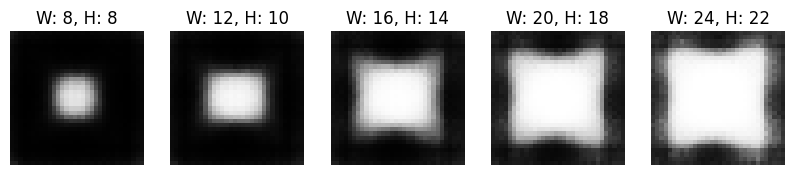

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, Input
import matplotlib.pyplot as plt

# Define the dimensions
image_size = 32

# Build the generator model
def build_generator():
    # Input layers for width and height
    width_input = Input(shape=(1,), name='width')
    height_input = Input(shape=(1,), name='height')

    # Concatenate width and height inputs
    inputs = layers.Concatenate()([width_input, height_input])

    # Dense layer to project inputs into higher dimensions
    x = layers.Dense(8 * 8 * 128)(inputs)
    x = layers.Reshape((8, 8, 128))(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Upsample to 16x16
    x = layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Upsample to 32x32
    x = layers.Conv2DTranspose(32, kernel_size=4, strides=2, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Final layer: Produce a 32x32 grayscale image
    output = layers.Conv2D(1, kernel_size=7, activation='sigmoid', padding='same')(x)

    # Define the model
    model = models.Model(inputs=[width_input, height_input], outputs=output)
    return model

# Build the generator model
generator = build_generator()
generator.summary()

# Define a function to generate the target white-square images with specific width and height
def generate_white_square_images(batch_size, widths, heights):
    images = np.zeros((batch_size, image_size, image_size, 1), dtype=np.float32)
    for i in range(batch_size):
        width = int(widths[i])
        height = int(heights[i])
        # Calculate the starting and ending indices for the square
        start_x = (image_size - width) // 2
        start_y = (image_size - height) // 2
        end_x = start_x + width
        end_y = start_y + height
        # Draw the white square in the center
        images[i, start_y:end_y, start_x:end_x, :] = 1.0
    return images

# Compile the model
generator.compile(optimizer='adam', loss='binary_crossentropy')

# Training loop
epochs = 100
batch_size = 32
for epoch in range(epochs):
    # Generate random widths and heights within a reasonable range
    widths = np.random.randint(4, 24, size=(batch_size, 1))
    heights = np.random.randint(4, 24, size=(batch_size, 1))

    # Generate target images based on these dimensions
    target_images = generate_white_square_images(batch_size, widths, heights)

    # Train the generator with these specific inputs and targets
    loss = generator.train_on_batch([widths, heights], target_images)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# Test the generator
# Generate a batch of test widths and heights
test_widths = np.array([[8], [12], [16], [20], [24]])
test_heights = np.array([[8], [10], [14], [18], [22]])
generated_images = generator.predict([test_widths, test_heights])

# Plot some generated images
plt.figure(figsize=(10, 2))
for i in range(len(generated_images)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(generated_images[i, :, :, 0], cmap='gray', vmin=0, vmax=1)
    plt.title(f"W: {test_widths[i][0]}, H: {test_heights[i][0]}")
    plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


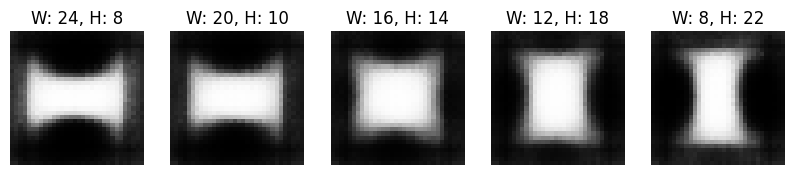

In [2]:
test_widths = np.array([[24], [20], [16], [12], [8]])
test_heights = np.array([[8], [10], [14], [18], [22]])
generated_images = generator.predict([test_widths, test_heights])

# Plot some generated images
plt.figure(figsize=(10, 2))
for i in range(len(generated_images)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(generated_images[i, :, :, 0], cmap='gray', vmin=0, vmax=1)
    plt.title(f"W: {test_widths[i][0]}, H: {test_heights[i][0]}")
    plt.axis('off')
plt.show()

In [3]:
# Example using zip in Python
width = [4, 8, 12]
height = [6, 10, 14]
combined_with_zip = list(zip(width, height))
print(combined_with_zip)
# Output: [(4, 6), (8, 10), (12, 14)]


[(4, 6), (8, 10), (12, 14)]


In [4]:
# Example using Concatenate layer
import tensorflow as tf

width = tf.constant([[4], [8], [12]])
height = tf.constant([[6], [10], [14]])
combined_with_concatenate = tf.keras.layers.Concatenate()([width, height])
print(combined_with_concatenate)
# Output: [[ 4  6]
#          [ 8 10]
#          [12 14]]


tf.Tensor(
[[ 4  6]
 [ 8 10]
 [12 14]], shape=(3, 2), dtype=int32)
